# **Data Visualization**

In [18]:
import nixio
import neo
import quantities as pq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

from frites.dataset import DatasetEphy
from frites.workflow import WfMi
import xarray as xr

from nilearn.plotting import plot_markers

Load Files

In [2]:
px = pq.UnitQuantity('px', pq.dimensionless, symbol='px') 
fps = pq.UnitQuantity('fps', pq.Hz, symbol='fps')

path_nix = '../data/nix_files/'
filename = 'subj_01_day_3_r_epo.nix'
with neo.io.NixIO(path_nix + filename, 'ro') as io:
    nix_data = io.read_block()

In [50]:
# Load MI result
mi = xr.load_dataarray("subject1_tvalues.nc")

In [51]:
mi.shape

(5501, 15)

In [52]:
x = nix_data.segments[0].analogsignals[0].array_annotations['chanlocs_x']
y = nix_data.segments[0].analogsignals[0].array_annotations['chanlocs_y']
z = nix_data.segments[0].analogsignals[0].array_annotations['chanlocs_z']

In [53]:
roi_names = pd.read_csv('../data/anat/aal_01_elecs2ROI.csv').columns
centroids = pd.read_csv('../data/anat/aal_01_ROIcentroids_Lside.csv').values

In [54]:
coords = centroids[np.array([pos for pos, roi in enumerate(roi_names) if roi in mi.roi.values])]

In [55]:
values = mi.mean("times")

In [56]:
from nilearn.plotting import plot_markers

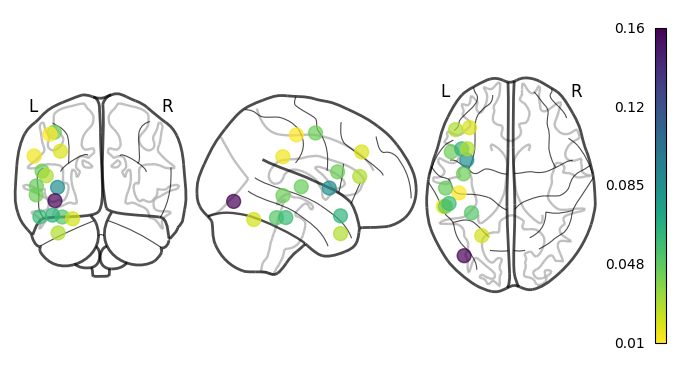

In [57]:
#coords = np.stack((x, y, z)).T
#values = np.ones((94,))
plot_markers(values, coords)